In [1]:
import networkx as nx
import networkit as nk

from panricci import RicciFlow
from panricci.distributions.variation_graph import DistributionNodes
# from panricci.distributions.sequence_graph import DistributionNodes
from panricci.utils import GFALoader

___
## Apply Ricci-Flow to a Variation Graph

In [2]:
# load graph
gfa_loader = GFALoader(undirected=False)
G = gfa_loader("../data/test1.gfa")

# compute distribution of nodes
distribution = DistributionNodes(G, alpha=0.5)

# Initialize ricci-flow
ricci_flow = RicciFlow(G, distribution, dirsave_graphs="../output/test3/ricci-flow")
G_ricci = ricci_flow.run(iterations=5, save_last=False, save_intermediate_graphs=False, name="test3")

RicciFlow: 100%|██████████| 5/5 [00:00<00:00, 998.50it/s]


## plot embeddings


<Axes: xlabel='from_source', ylabel='to_sink'>

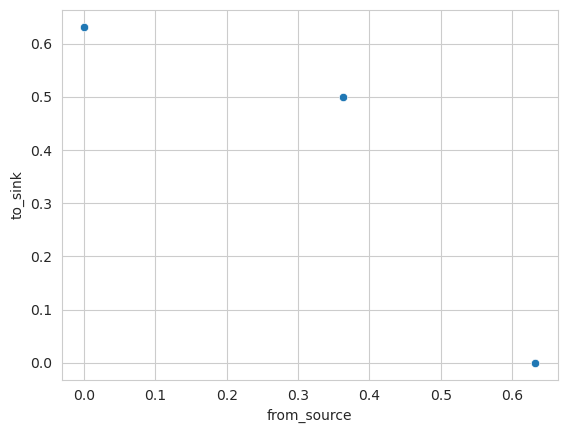

In [3]:
import seaborn as sns
import pandas as pd
from panricci.alignment.node_features import compute_node_embeddings

node_emb = compute_node_embeddings(G_ricci)
coords = pd.DataFrame.from_dict(node_emb,orient="index",columns=["from_source","to_sink"])
sns.scatterplot(coords, x="from_source",y="to_sink",)

___

## Results

**Checkpoints can be loaded**

In [6]:
path_edgelist = "../output/test3/ricci-flow/test3-ricciflow-5.edgelist"
path_edgelist = "../output/graph-alignment/ricci-flow/DQA1-3117-alpha50-ricciflow-5.edgelist"
# path_edgelist = "../output/graph-alignment/ricci-flow/DQA1-3117-alpha1-ricciflow-5.edgelist"

G_chkpt = nx.read_edgelist(
                        path_edgelist,    # path checkpoint
                        nodetype=int, 
                        create_using=nx.DiGraph
                        )

<Axes: xlabel='to_sink', ylabel='from_source'>

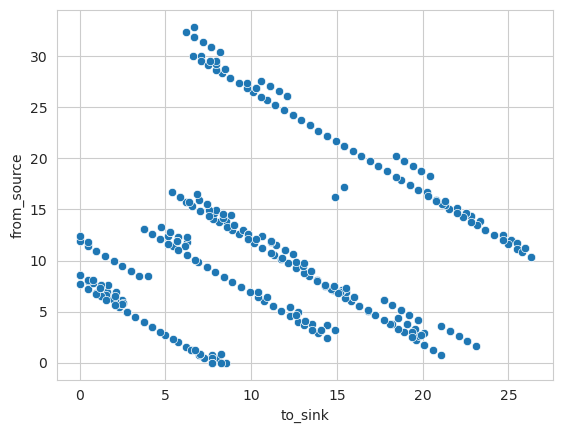

In [7]:
node_emb = compute_node_embeddings(G_chkpt)
coords = pd.DataFrame.from_dict(node_emb,orient="index",columns=["from_source","to_sink"])
sns.scatterplot(coords, x="to_sink",y="from_source",)

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
X = coords
clustering = DBSCAN(eps=1.5, min_samples=5).fit(X)

In [10]:
set(clustering.labels_)

{-1, 0, 1, 2, 3, 4}

In [11]:
coords["cluster"] = clustering.labels_

<Axes: xlabel='to_sink', ylabel='from_source'>

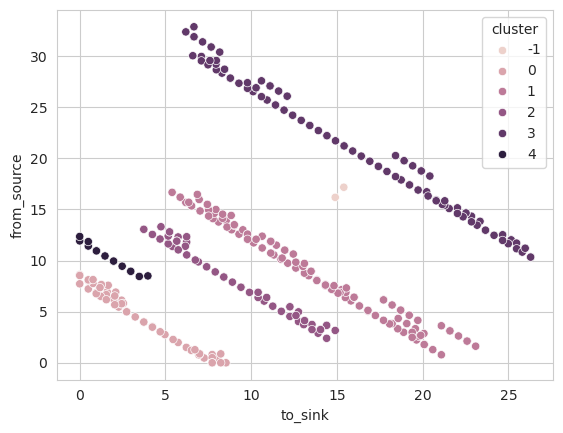

In [12]:
sns.scatterplot(coords, x="to_sink",y="from_source", hue="cluster")

In [34]:
coords.reset_index(names="node", inplace=True)
coords.to_csv("alpha50-labels.csv")

In [36]:
coords.sort_values(by="cluster")

,node,from_source,to_sink,cluster
63,30,17.172424,15.397470,-1
244,217,16.182407,14.897470,-1
156,76,8.133604,0.777145,0
155,75,7.649816,1.260933,0
154,276,8.112443,0.500000,0
...,...,...,...,...
281,184,10.947812,0.974216,4
207,324,10.447812,1.474216,4
206,112,9.947812,1.974216,4
163,292,12.355041,0.000000,4


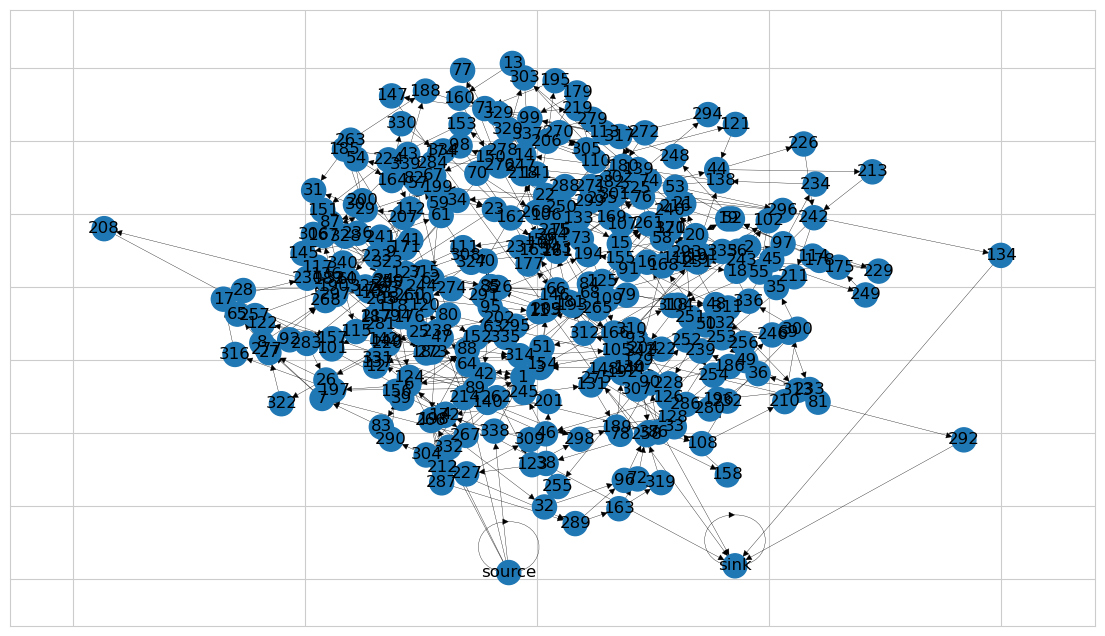

In [55]:
import matplotlib.pyplot as plt

G=G_chkpt 
fig, ax = plt.subplots(1,1, figsize=(14,8), dpi=100)
pos = nx.spring_layout(G, iterations=20)
cmap = plt.cm.tab10
node_colors = [0.4] * G.number_of_nodes()
# node_colors[ID_INSTR] = 0.
# node_colors[ID_ADMIN] = 1.
# node_labels = {i: i for i in ID_MEMBERS}
# node_labels.update({i: l for i,l in zip([ID_ADMIN, ID_INSTR],['A','I'])})
nx.draw_networkx(G,
                 pos,
                 node_color=node_colors,
                 width=.25,
                #  labels=node_labels,
                 ax=ax,
                 cmap=cmap)

In [56]:
feature = "weight"
alpha=[]

for edgeinfo in G.edges.data():
    start,end,info=edgeinfo
    alpha.append(info[feature])

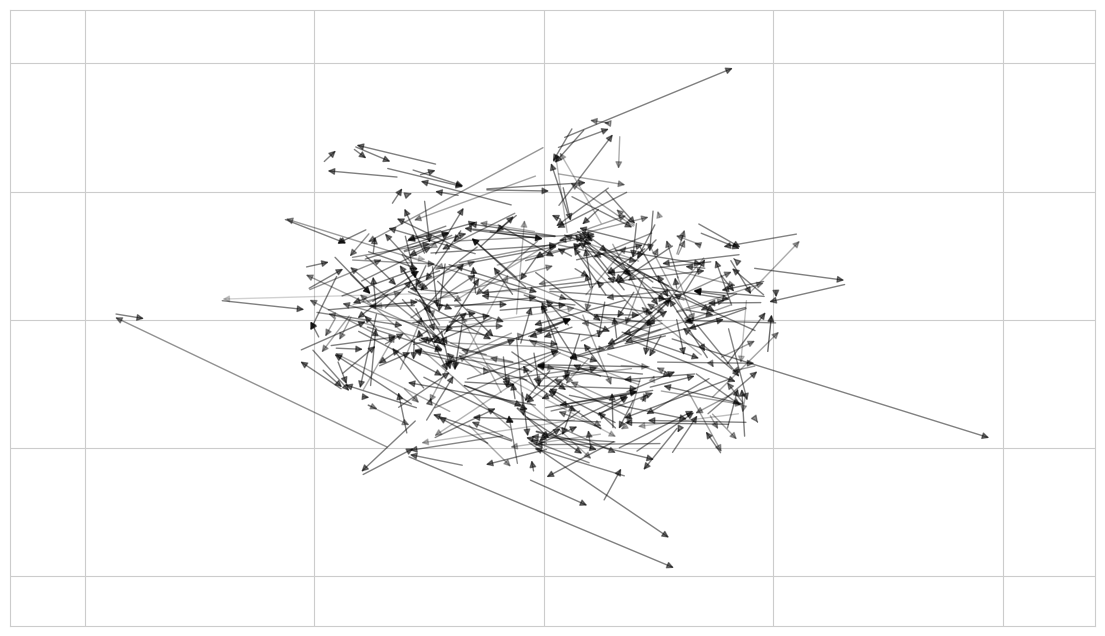

In [57]:
fig, ax = plt.subplots(1,1, figsize=(14,8), dpi=100)
pos = nx.spring_layout(G, iterations=20)
nx.draw_networkx_edges(G, pos, alpha=alpha, edge_cmap=plt.cm.Blues,)

In [47]:
pos

{1: array([-0.06443535, -0.1537877 ]),
 1305: array([-0.25638741, -0.09523633]),
 2: array([-0.25143152, -0.00488966]),
 909: array([-0.40037355,  0.01232133]),
 3: array([-0.30097094, -0.01181512]),
 1182: array([-0.24158563,  0.09244948]),
 1439: array([-0.18296464, -0.00292775]),
 4: array([-0.07499442,  0.13976477]),
 1055: array([0.03370158, 0.1383177 ]),
 1464: array([0.09667564, 0.21827485]),
 5: array([0.33587012, 0.05314958]),
 1474: array([ 0.33688188, -0.07621146]),
 6: array([ 0.32139963, -0.111885  ]),
 409: array([ 0.43441084, -0.05596694]),
 7: array([-0.09826096, -0.34719026]),
 293: array([-0.18786165, -0.30267212]),
 878: array([-0.34802434, -0.38145158]),
 8: array([-0.26354232,  0.14194302]),
 664: array([-0.13399677,  0.3494691 ]),
 9: array([0.0241942 , 0.21662676]),
 10: array([0.13768409, 0.19226933]),
 968: array([0.20065269, 0.1645468 ]),
 946: array([0.37946868, 0.06964523]),
 11: array([ 0.43893659, -0.1012134 ]),
 351: array([ 0.24523275, -0.15278037]),
 12

In [ ]:
G_chkpt.nodes(), G_chkpt.edges(), G_chkpt.edges[(1,2)]

### Using networkit

In [ ]:
G_ricci_nk = nk.nxadapter.nx2nk(G_ricci,  weightAttr="weight")

In [ ]:
G_ricci_nk.totalEdgeWeight()

In [ ]:
nk.overview(G_ricci_nk)

In [ ]:
import pandas as pd
import seaborn as sns
df=pd.DataFrame(list(G.edges(data=True)), columns=["node1","node2","feats"])

In [ ]:
df[["curvature","weights"]]=df["feats"].apply(lambda row: pd.Series(row))

In [ ]:
sns.histplot(data=df, x="curvature", stat="count", bins=100, discrete=False)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
%matplotlib notebook

In [ ]:
def animate(i):
    G=nx.read_edgelist(
    f"/home/avila/panricci/output/DQA1-3117-nodes-alpha/nodes-a5-ricciflow-{i}.edgelist",
    nodetype=int, 
    create_using=nx.DiGraph
    )
    df=pd.DataFrame(list(G.edges(data=True)), columns=["node1","node2","feats"])
    graph = sns.histplot(data=df, x="curvature", stat="count", bins=100, discrete=False)

In [ ]:
fig = plt.figure()
fig.suptitle('Histogram of curvatures per epoch', fontsize=14) 

anim = animation.FuncAnimation(fig, animate, frames=20,interval=700,repeat=True)
anim.save("../ricciflow-curvatures.mp4")
# converting to an html5 video 
video = anim.to_html5_video() 
  
# embedding for the video 
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
plt.close() 